# Open data 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import integrate

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 9

In [7]:
columns = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets']
for i in range (1,24):
    columns.append( 'jet' + str(i) + '_pt' )
    columns.append( 'jet' + str(i) + '_eta' )
    columns.append( 'jet' + str(i) + '_phi' )
    columns.append( 'jet' + str(i) + '_E' )
    columns.append( 'jet' + str(i) + '_DL1R' )
    
print (columns)

['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_E', 'jet1_DL1R', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_E', 'jet2_DL1R', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_E', 'jet3_DL1R', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_E', 'jet4_DL1R', 'jet5_pt', 'jet5_eta', 'jet5_phi', 'jet5_E', 'jet5_DL1R', 'jet6_pt', 'jet6_eta', 'jet6_phi', 'jet6_E', 'jet6_DL1R', 'jet7_pt', 'jet7_eta', 'jet7_phi', 'jet7_E', 'jet7_DL1R', 'jet8_pt', 'jet8_eta', 'jet8_phi', 'jet8_E', 'jet8_DL1R', 'jet9_pt', 'jet9_eta', 'jet9_phi', 'jet9_E', 'jet9_DL1R', 'jet10_pt', 'jet10_eta', 'jet10_phi', 'jet10_E', 'jet10_DL1R', 'jet11_pt', 'jet11_eta', 'jet11_phi', 'jet11_E', 'jet11_DL1R', 'jet12_pt', 'jet12_eta', 'jet12_phi', 'jet12_E', 'jet12_DL1R', 'jet13_pt', 'jet13_eta', 'jet13_phi', 'jet13_E', 'jet13_DL1R', 'jet14_pt', 'jet14_eta', 'jet14_phi', 'jet14_E', 'jet14_DL1R', 'jet15_pt', 'jet15_eta', 'jet15_phi', 'jet15_E', 'jet15_DL1R', 'jet16_pt', 'jet

In [8]:
data = pd.read_csv('data_2015_2018.csv', header = None, names = columns)

In [9]:
data.head()

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,130464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,79894.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet22_pt,jet22_eta,jet22_phi,jet22_E,jet22_DL1R,jet23_pt,jet23_eta,jet23_phi,jet23_E,jet23_DL1R
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,130464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,79894.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3,123848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3,43618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5,139249.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915049,58914.9,2.280170,0.011987,291057.0,48413.6,1.742550,-1.590900,142505.0,3,59373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot photon variables

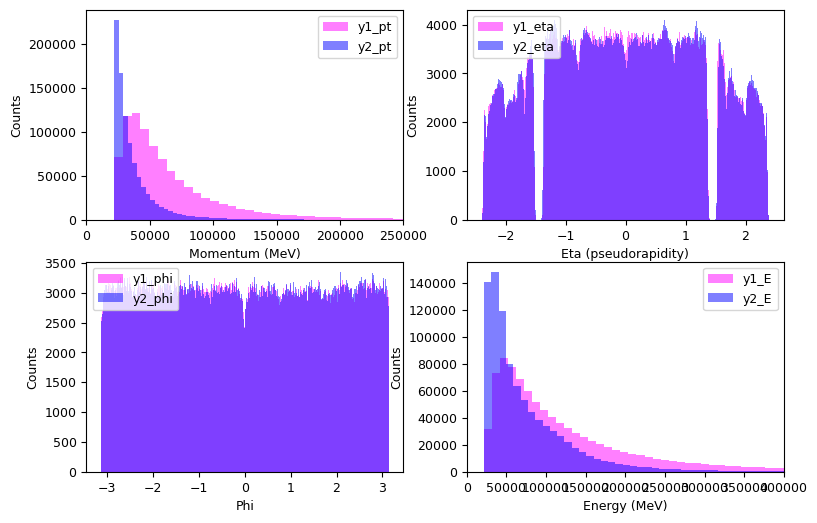

In [14]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['y1_pt'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_pt')
axs[0, 0].hist(data['y2_pt'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_pt');
axs[0,0].set_xlabel('Momentum (MeV)')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xlim(0, 0.25e6)
axs[0,0].legend()

axs[0, 1].hist(data['y1_eta'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_eta')
axs[0, 1].hist(data['y2_eta'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_eta');
axs[0,1].set_xlabel('Eta (pseudorapidity)')
axs[0,1].set_ylabel('Counts')
axs[0,1].legend()

axs[1, 0].hist(data['y1_phi'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_phi')
axs[1, 0].hist(data['y2_phi'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_phi');
axs[1,0].set_xlabel('Phi')
axs[1,0].set_ylabel('Counts')
axs[1,0].legend()

axs[1, 1].hist(data['y1_E'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_E')
axs[1, 1].hist(data['y2_E'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_E');
axs[1,1].set_xlabel('Energy (MeV)')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xlim(0, 0.4e6)
axs[1,1].legend();

# 4 Mom 

In [15]:
def fomy(x, num):
    
    string = 'y' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [16]:
data['y1_fom'] = data.apply(lambda x: fomy(x, 1), axis = 1).apply(lambda x: x)
data['y2_fom'] = data.apply(lambda x: fomy(x, 2), axis = 1).apply(lambda x: x)
data = data.assign(H_fom = data.y1_fom + data.y2_fom)

## Mass dist.

C:\Users\s1974479\AppData\Local\Temp\ipykernel_17320\1965249961.py:4: RuntimeWarning: invalid value encountered in sqrt
  H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)


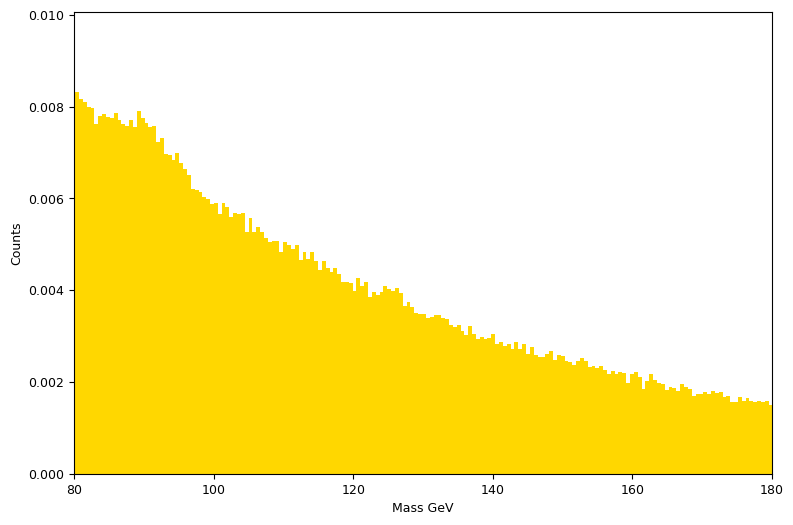

In [17]:
H_mass = []

for row in data.H_fom:
    H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(H_mass, bins = 5000, color = 'gold', density = True)
plt.xlim(80, 180)
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

In [18]:
H_array = np.array(H_mass)
vals1 = (95 < H_array)
H_array = H_array[vals1]
vals2 = (170 > H_array)
H_array = H_array[vals2]

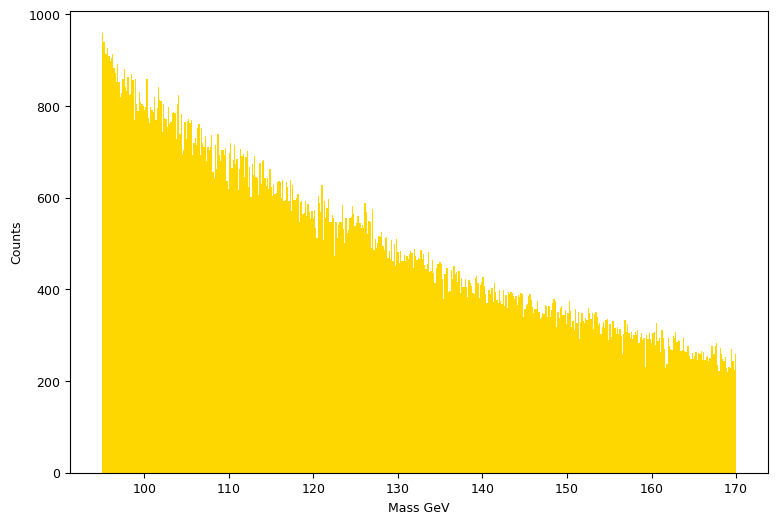

In [19]:
plt.hist(H_array, bins = 500, color = 'gold')
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

In [20]:
data.describe()['Njets'][['min', 'max']]

min     3.0
max    23.0
Name: Njets, dtype: float64

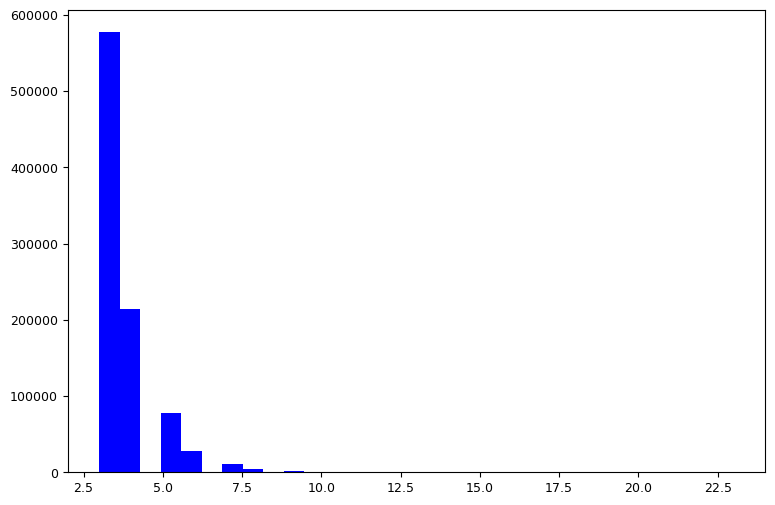

In [21]:
n, bins, patches = plt.hist(data['Njets'], bins = 31, color = 'blue');

In [22]:
pts = np.array([])

for i in range(1,32):
    string = 'jet' + str(i) + '_pt'
    array = np.array(data[string])
    pts = np.append(pts, array)

KeyError: 'jet24_pt'

In [ ]:
n, bins, patches = plt.hist(pts, bins = 1000, color = 'blue', alpha = 0.8)
plt.xlabel('jet pt')
plt.xlim(0, 0.4*1e6)
plt.ylabel('Counts');

In [ ]:
dl1rs = np.array([])

for i in range(1,32):
    string = 'jet' + str(i) + '_DL1R'
    array = np.array(data[string])
    dl1rs = np.append(dl1rs, array)

In [ ]:
plt.hist(dl1rs, bins = 300, color = 'blue')
plt.xlabel('jet DL1R')
plt.ylabel('Counts');